In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('2022_HiMCM_Data_temp.csv')
df = df.iloc[:, :2]
df

,Year,Degrees C
0,1958,0.06
1,1959,0.03
2,1960,-0.03
3,1961,0.06
4,1962,0.03
...,...,...
59,2017,0.92
60,2018,0.84
61,2019,0.97
62,2020,1.02


In [6]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [7]:
X = df['Year'].values
y = df['Degrees C'].values
X = X.reshape(-1,1)

In [8]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
poly.fit(X_poly, y)

PolynomialFeatures()

In [9]:
linreg = LinearRegression()
linreg.fit(X_poly, y)

y_pred = linreg.predict(X_poly)

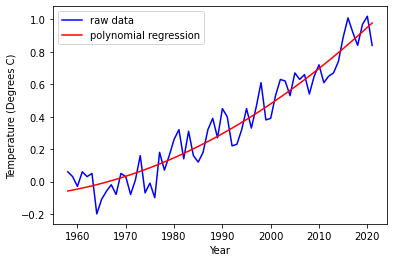

In [10]:
plt.plot(X, y, c='blue', label='raw data' )
plt.plot(X, y_pred, c='red', label='polynomial regression')
plt.xlabel('Year')
plt.ylabel('Temperature (Degrees C)')
plt.legend()

In [12]:
print(linreg.coef_)
print(linreg.intercept_)

[ 0.00000000e+00 -6.77097049e-01  1.74304862e-04]
657.4537993873641


In [13]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(df['Degrees C'], y_pred))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.092
